A) Linear regression using numpy (Normal Equation)

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("california_house_price_prediction.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [14]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [16]:
df.shape

(20640, 10)

In [17]:
df = df.fillna(df.mean(numeric_only=True))
df.shape


(20640, 10)

In [18]:
X = df.drop(['median_house_value','ocean_proximity'], axis = 1).values
y = df['median_house_value'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
print(type(X_train))
print(X_train.shape)
print(X_train[:5])
df.head()

<class 'numpy.ndarray'>
(14448, 8)
[[-1.1802e+02  3.3930e+01  3.5000e+01  2.4000e+03  3.9800e+02  1.2180e+03
   4.0800e+02  4.1312e+00]
 [-1.1709e+02  3.2790e+01  2.0000e+01  2.1830e+03  5.3400e+02  9.9900e+02
   4.9600e+02  2.8631e+00]
 [-1.2014e+02  3.4590e+01  2.4000e+01  1.6010e+03  2.8200e+02  7.3100e+02
   2.8500e+02  4.2026e+00]
 [-1.2100e+02  3.9260e+01  1.4000e+01  8.1000e+02  1.5100e+02  3.0200e+02
   1.3800e+02  3.1094e+00]
 [-1.2245e+02  3.7770e+01  5.2000e+01  3.1880e+03  7.0800e+02  1.5260e+03
   6.6400e+02  3.3068e+00]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [21]:
print('any nan in X_train: ', np.isnan(X_train).any())
print('any nan in X_test: ', np.isnan(X_test).any())
print('any nan in y_train: ', np.isnan(y_train).any())
print('any nan in y_test: ', np.isnan(y_test).any())

any nan in X_train:  False
any nan in X_test:  False
any nan in y_train:  False
any nan in y_test:  False


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [23]:
X_train_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0],1)), X_test]


In [24]:
theta_best = np.linalg.pinv(X_train_b).dot(y_train)
print(theta_best)
print(np.isnan(theta_best).any())   # should be False
print("X_train_b.T.dot(X_train_b) condition number:", 
      np.linalg.cond(X_train_b.T.dot(X_train_b)))



[206923.96089423 -85408.02864217 -90361.94041423  14948.69572167
 -17422.70079188  50168.62135774 -42830.82185189  15174.51601629
  76881.40633056]
False
X_train_b.T.dot(X_train_b) condition number: 267.4753982106743


In [25]:
y_pred = np.dot(X_test_b,theta_best)
print(y_pred.shape,y_test.shape)

(6192,) (6192,)


In [26]:
mse = np.mean((y_pred - y_test) ** 2)
r2  = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))
print('mean square error is: ', mse)
print('r2 error is: ', r2)


mean square error is:  4852059947.12914
r2 error is:  0.6303305386065025


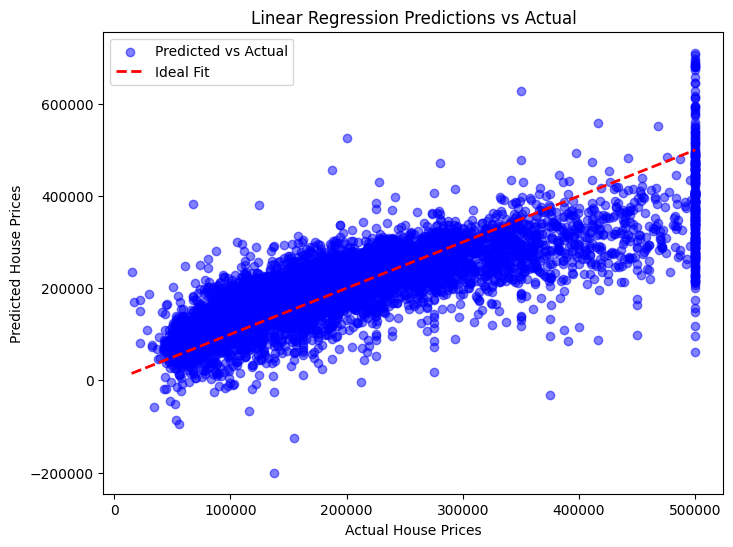

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, c='b', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression Predictions vs Actual")
plt.legend()
plt.show()


B) Linear regression using Gradient Descent

In [52]:
def compute_gradient_descent(X,y,learning_rate=0.01,n_iters= 10000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for _ in range(n_iters):
        error = X.dot(theta) - y
        gradient = (1 / m) * X.T.dot(error)
        theta -= learning_rate * gradient

        cost = (1 / (2 * m) ) * np.sum(error ** 2)
        cost_history.append(cost)
        if( _ % 1000 == 0):
            print(f"cost in {_} iteration is : ", cost)

    return theta, cost_history


In [53]:
theta_gd, cost_history = compute_gradient_descent(X_train_b,y_train,learning_rate=0.01,n_iters=10000)
print(theta_gd)

cost in 0 iteration is :  28107242683.440372
cost in 1000 iteration is :  2579791518.756322
cost in 2000 iteration is :  2467948181.915354
cost in 3000 iteration is :  2443485643.1696157
cost in 4000 iteration is :  2437155156.924042
cost in 5000 iteration is :  2435079854.1773367
cost in 6000 iteration is :  2434181305.7504416
cost in 7000 iteration is :  2433689946.902058
cost in 8000 iteration is :  2433378614.0001097
cost in 9000 iteration is :  2433164981.5875974
[206923.96089423 -84763.68324638 -89814.95556529  14932.28778442
 -16614.04953105  44886.71427693 -43784.53560581  20556.04116839
  76658.98062613]


In [55]:
final_cost = cost_history[-1]
print(final_cost)

2433012373.4649386


In [58]:
y_pred = X_test_b.dot(theta_gd)


In [62]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_pred,y_test)
r2 = mean_squared_error(y_test,y_pred)
print(f'mse is: ', mse, 'and', "r2 is:", r2)

mse is:  4832368008.049723 and r2 is: 4832368008.049723


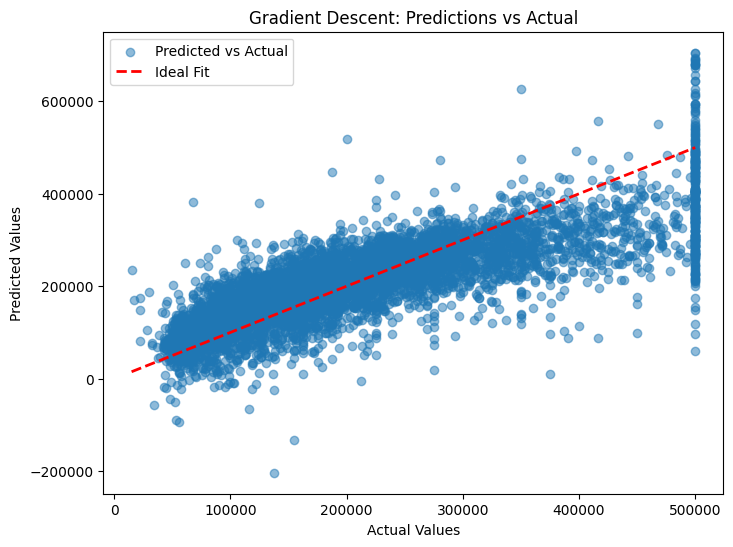

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Descent: Predictions vs Actual")
plt.legend()
plt.show()


C) Using scikit learn's Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [68]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
y_pred = model.predict(X_test)

In [74]:
mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_test,y_pred)
print('mse is: ', mse)
print('r2 is: ', r2)

mse is:  4852059947.12914
r2 is:  0.6303305386065023


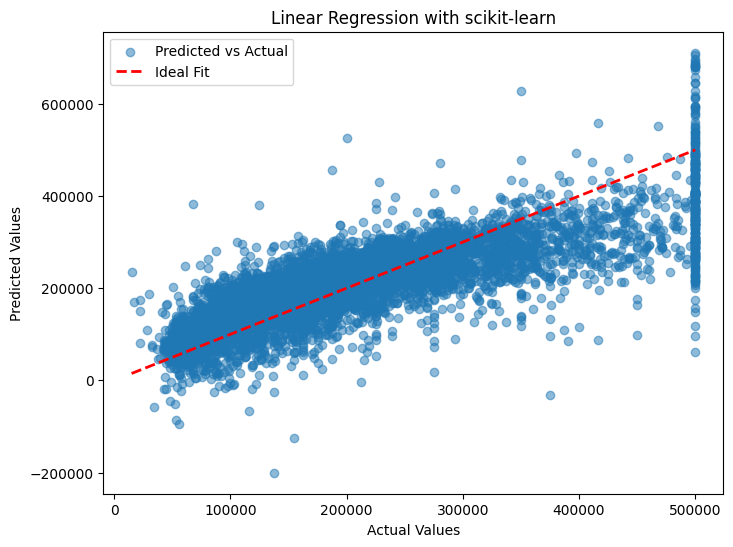

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.show()